<a href="https://colab.research.google.com/github/morekaccino/PricesLaw/blob/main/PricesLaw_FixedSpendingRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

With Constant Spending

In [1]:
from enum import Enum
from random import randint, choice, random
import numpy as np
import matplotlib.pyplot as plt

In [7]:
n = 100
pop = np.ones((n, n))
spending_ratio = np.random.rand(n, n)
class Direction(Enum):
  top = 0
  bottom = 1
  left = 2
  right = 3

In [8]:
def epoch():
  for i in range(len(pop)):
    for j in range(len(pop[i])):
      
      if pop[i, j] <= 0:
        continue
      
      direction = choice(list(Direction))
      if direction == Direction.top:
        pop[(i-1) % n, j] += spending_ratio[i, j] * pop[i, j]
      elif direction == Direction.bottom:
        pop[(i+1) % n, j] += spending_ratio[i, j] * pop[i, j]
      elif direction == Direction.left:
        pop[i, (j-1) % n] += spending_ratio[i, j] * pop[i, j]
      elif direction == Direction.right:
        pop[i, (j+1) % n] += spending_ratio[i, j] * pop[i, j]
      else:
        raise Exception("None of the direction were matched.")
      pop[i, j] -= (spending_ratio[i, j] * pop[i, j])
        


In [9]:
for q in range(2000):
  epoch()

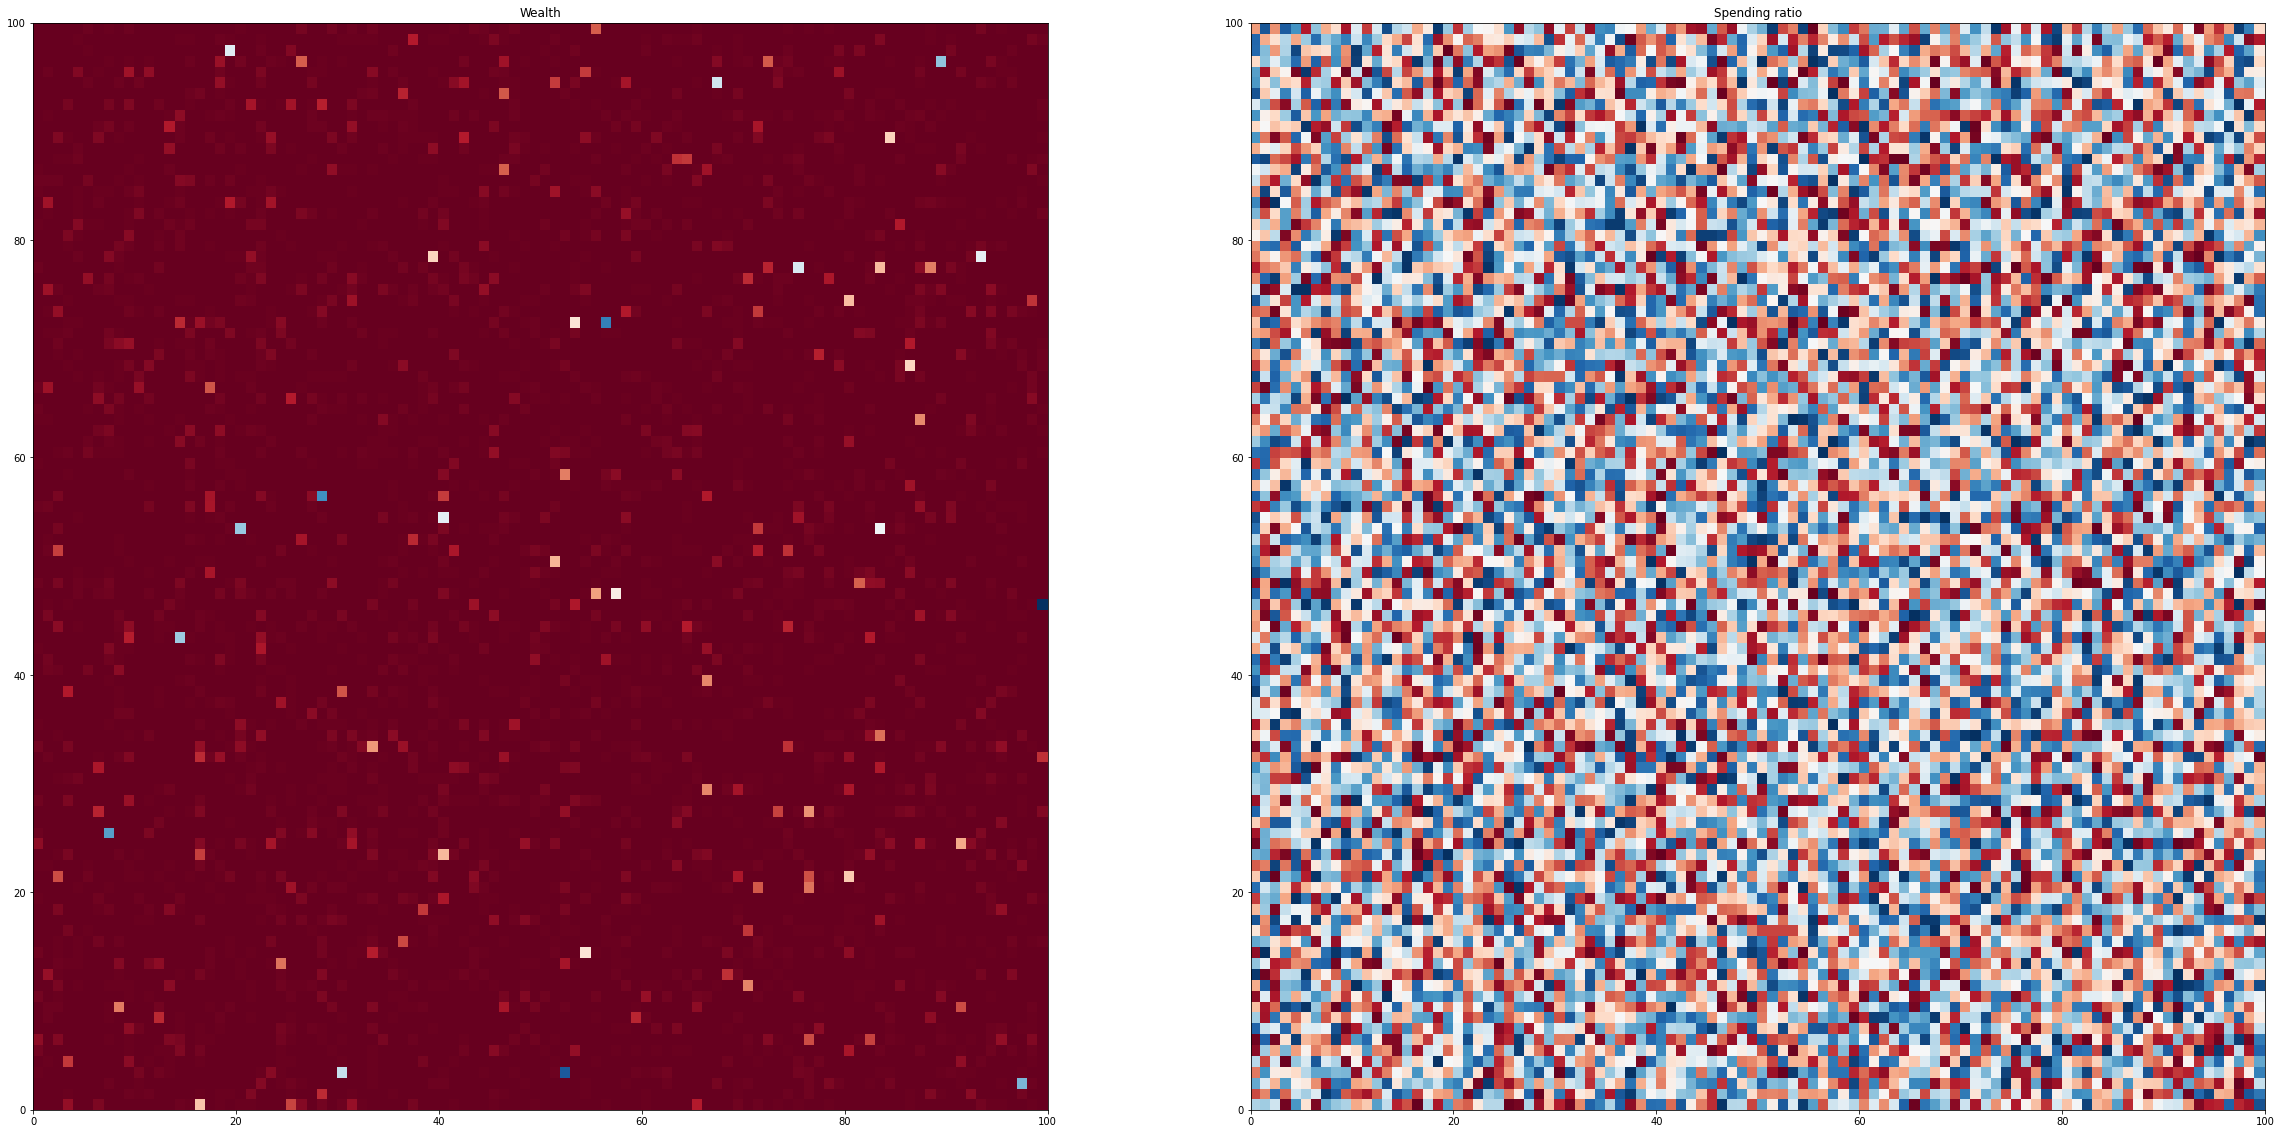

In [29]:
figure, axis = plt.subplots(1, 2)

figure.set_size_inches(40, 20)

axis[0].pcolor(pop, cmap='RdBu')
axis[0].set_title("Wealth")

axis[1].pcolor(spending_ratio, cmap='RdBu')
axis[1].set_title("Spending ratio")

plt.show()

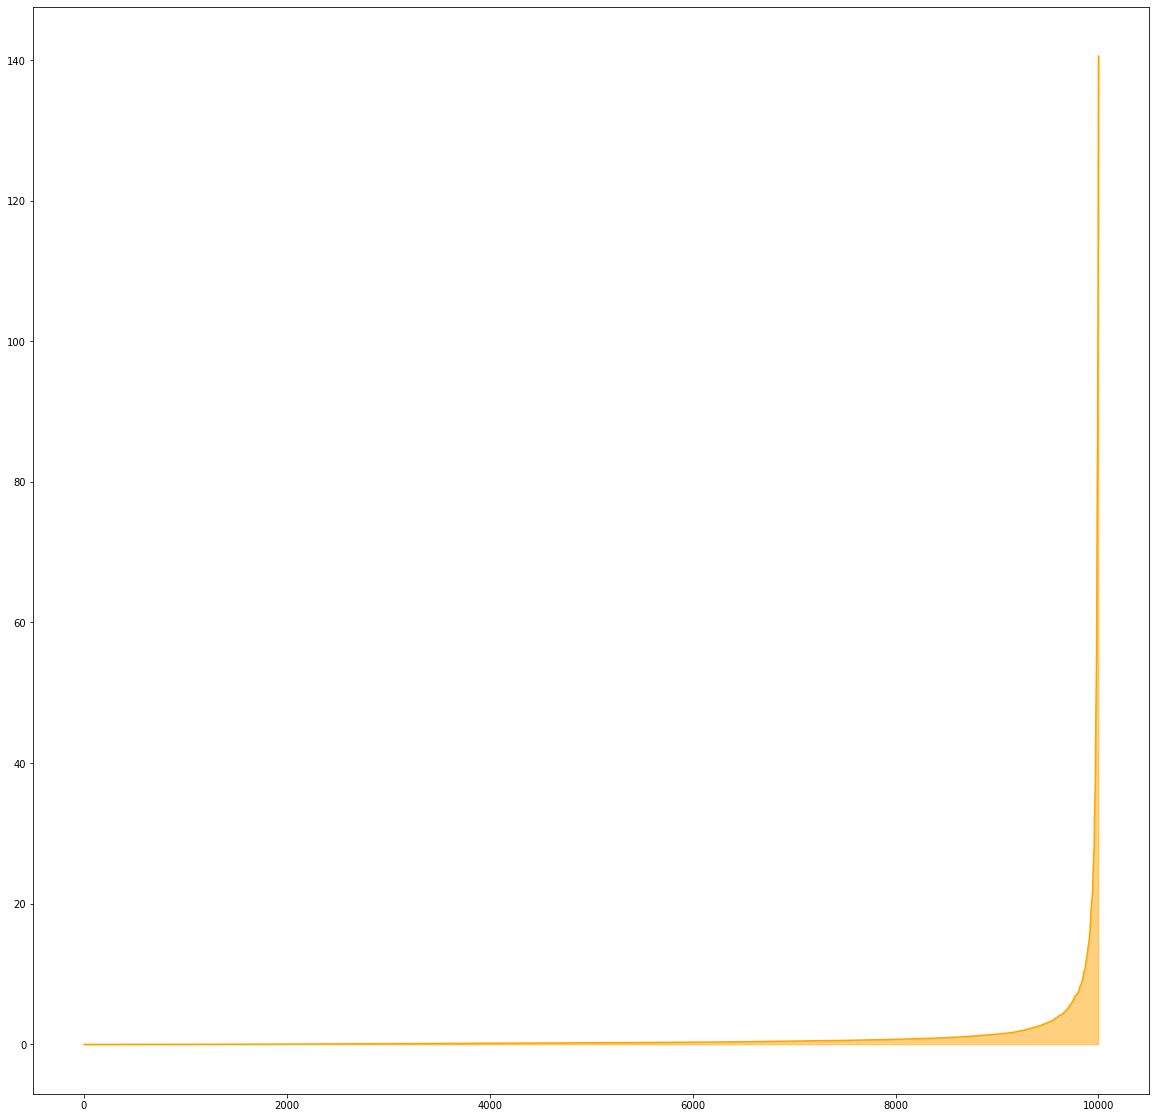

In [32]:
linear = np.copy(pop)
linear = linear.reshape(n*n)
linear = np.sort(linear)

plt.figure(figsize=(20, 20))
plt.fill_between(list(range(1, 10001)), linear, color='orange', alpha=0.5)
plt.plot(list(range(1, 10001)), linear, color='orange')

Lower 50 percent wealth possession: 429<br>
Top 1 percent wealth pessession: 3866<br>
$ratio = \frac{top \, 1 \, percent}{lower \, 50 \, percent} = \frac{3866}{429}=9.012$

In [12]:
# lower 50 percent
lower = sum(linear[0:n*n//2])
top1 =  sum(linear[(n*n)-((n*n)//100):])

print('lower 50%:',lower)
print('top one percent:',top1)

lower 50%: 429.44735996589185
top one percent: 3866.605463273692


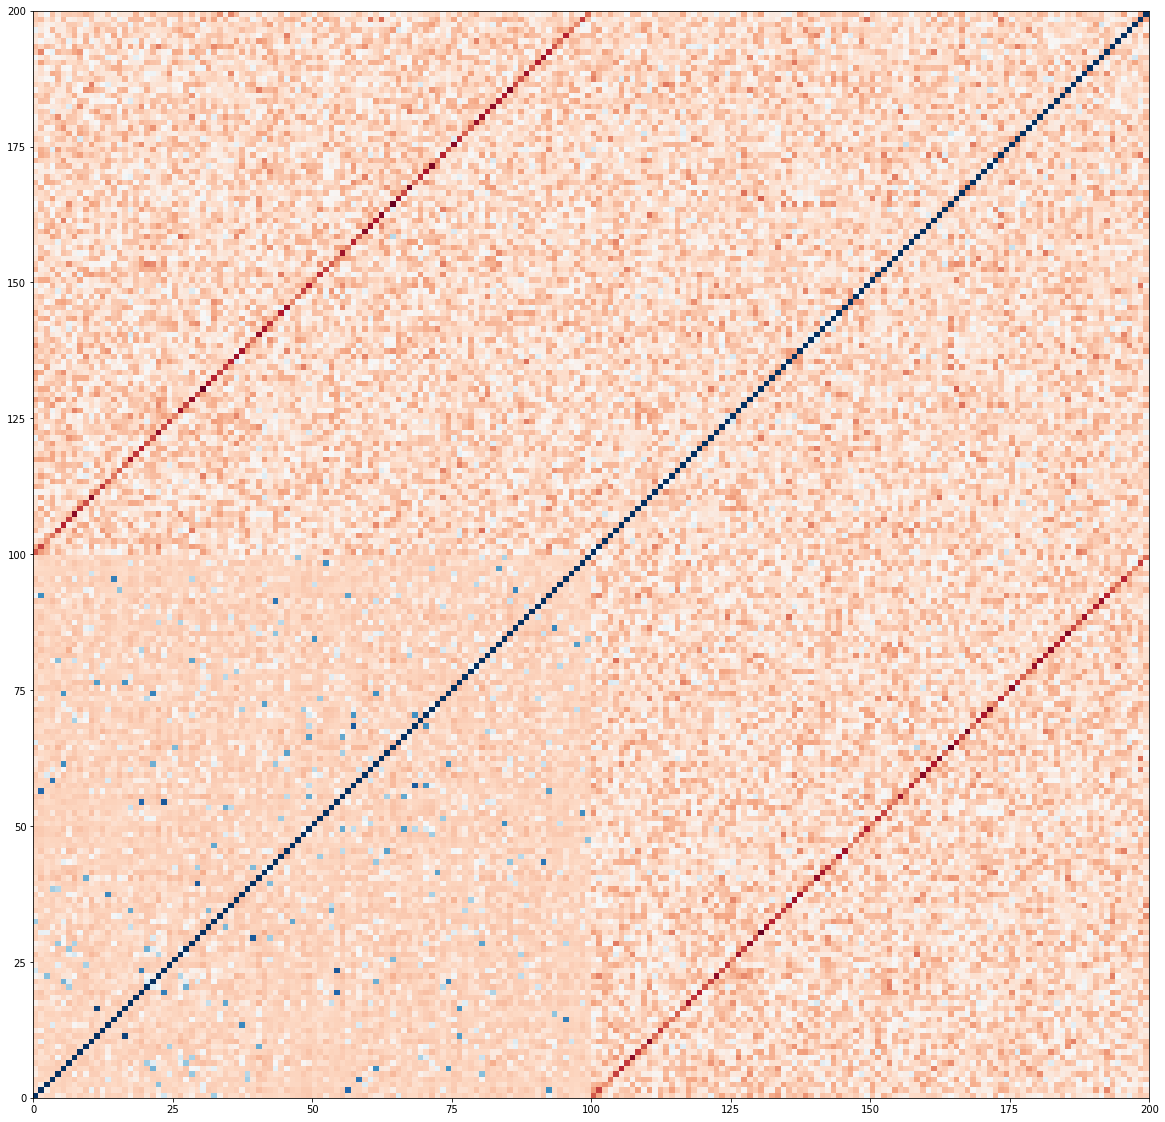

In [34]:
pearson = np.corrcoef(pop, spending_ratio)

plt.figure(figsize=(20, 20))
plt.pcolor(pearson, cmap='RdBu')

plt.show()

In [43]:
def correlation_coefficient(T1, T2):
    numerator = np.mean((T1 - T1.mean()) * (T2 - T2.mean()))
    denominator = T1.std() * T2.std()
    if denominator == 0:
        return 0
    result = numerator / denominator
    return result

correlation_coefficient(pop, spending_ratio)

-0.26981356524282124